In [16]:

import pickle
with open('/content/images.p', 'rb') as f:
  images = pickle.load(f)

with open('/content/labels.p', 'rb') as f:
  labels = pickle.load(f)

In [17]:
print(images.shape)
print(labels.shape)

(489, 100, 100)
(489,)


In [18]:
labels

array(['Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia',
       'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia',
       'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia',
       'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia',
       'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia',
       'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia',
       'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia',
       'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia',
       'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia',
       'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia',
       'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia',
       'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia',
       'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia',
       'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Kalia', 'Naresh',
       'Naresh', 'N

In [19]:

set(labels)

{'Kalia', 'Naresh', 'Pratiman', 'Santosh', 'Soumya'}

In [20]:
#Label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [21]:
set(labels)

{0, 1, 2, 3, 4}

In [22]:
import numpy as np

In [23]:
#counting total number of persons

p=len(set(labels))
print("Number of persons ", p)

a=le.inverse_transform(np.arange(p))
for i in range(p):
  print(i,' ----> ', a[i])

Number of persons  5
0  ---->  Kalia
1  ---->  Naresh
2  ---->  Pratiman
3  ---->  Santosh
4  ---->  Soumya


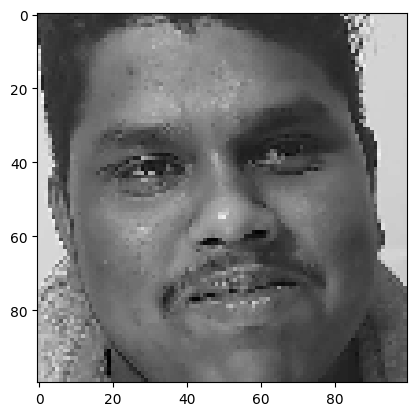

In [24]:
import matplotlib.pyplot as plt

plt.imshow(images[96], cmap='gray')
plt.show()

In [25]:
import cv2

In [26]:
def preprocess(img):
  img = cv2.equalizeHist(img)
  img=img.reshape(100,100,1)
  img = img/255
  return img

In [27]:
images=np.array(list(map(preprocess, images)))
print('Shape of input : ', images.shape)

Shape of input :  (489, 100, 100, 1)


In [28]:
from keras.utils import to_categorical
labels = to_categorical(labels)

In [29]:
#Model Training

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from keras.layers import Conv2D, MaxPooling2D, Flatten

In [30]:
def create_Model():
  model = Sequential()
  #Convolutional Layer & Relu Layer
  model.add(Conv2D(30, (5,5), input_shape=(100,100,1), activation='relu'))

  #Pooling Layer
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  #Flatten Layer
  model.add(Flatten())


  #Hidden Layer
  model.add(Dense(100, activation='relu'))
  model.add(Dense(50, activation='relu'))

  #Output Layer
  model.add(Dense(5, activation='softmax'))

  model.compile(Adam(learning_rate=0.01), loss="categorical_crossentropy",metrics=['accuracy'])

  return model

In [31]:
model=create_Model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 30)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 15)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 7935)              0         
                                                                 
 dense (Dense)               (None, 100)               7

In [32]:
h=model.fit(images, labels, validation_split=0.1,epochs=15)

Epoch 1/15
14/14 [==============================] - 6s 297ms/step - loss: 2.8304 - accuracy: 0.4795 - val_loss: 1.4351 - val_accuracy: 0.0000e+00
Epoch 2/15
14/14 [==============================] - 5s 335ms/step - loss: 0.2450 - accuracy: 0.9136 - val_loss: 0.0846 - val_accuracy: 1.0000
Epoch 3/15
14/14 [==============================] - 5s 331ms/step - loss: 0.0294 - accuracy: 0.9977 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 4/15
14/14 [==============================] - 4s 286ms/step - loss: 0.0081 - accuracy: 0.9977 - val_loss: 9.2996e-04 - val_accuracy: 1.0000
Epoch 5/15
14/14 [==============================] - 4s 299ms/step - loss: 0.0094 - accuracy: 0.9977 - val_loss: 5.1016e-04 - val_accuracy: 1.0000
Epoch 6/15
14/14 [==============================] - 5s 373ms/step - loss: 0.0073 - accuracy: 0.9955 - val_loss: 2.6787e-04 - val_accuracy: 1.0000
Epoch 7/15
14/14 [==============================] - 4s 278ms/step - loss: 0.0057 - accuracy: 0.9977 - val_loss: 0.0011 - val_accurac

In [34]:
model.save('final_model.h5')